# Predicting Restaurant Food Cost 
REGRESSION PROBLEM

In [1]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORTING THE DATASET(TRAIN AND TEST DATA SET)
train_df = pd.read_excel("C:\\Users\\PUNEET SINGH\\Data_Train.xlsx")
test_df =  pd.read_excel("C:\\Users\\PUNEET SINGH\\Data_Test.xlsx")

In [3]:
train_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
test_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


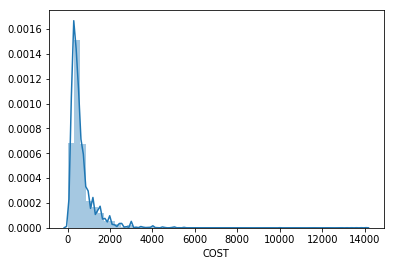

In [5]:
# Checking the normality of the Target variable Cost
sns.distplot(train_df['COST'])

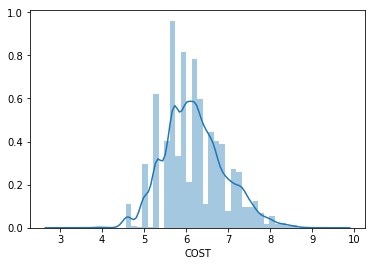

In [6]:
# Data is right skewed 
# so can apply log function on for the normality
tst=np.log(train_df['COST'])
sns.distplot(tst)

In [7]:
# Checking the info of the train and test data
print("Info of the training set:",train_df.info(),train_df.dtypes)
print("__"*40)
print("Info of the testing set :",test_df.info(),test_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null object
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null object
TIME             12690 non-null object
CITY             12578 non-null object
LOCALITY         12592 non-null object
RATING           12688 non-null object
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(2), object(7)
memory usage: 892.3+ KB
Info of the training set: None TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object
________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
TITLE            4231 non-null object
RESTA

In [8]:
# Checking for the null values in the training and testing set
print("Null values in the training set :",train_df.isnull().sum())
print("__"*40)
print("Null values in the testing set :",test_df.isnull().sum())

Null values in the training set : TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64
________________________________________________________________________________
Null values in the testing set : TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64


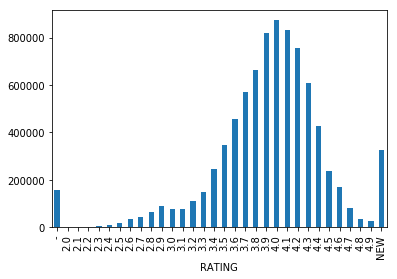

In [9]:
train_df.groupby(['RATING'])['COST'].sum().plot(kind='bar')

In [10]:
# WE CAN SEE IN THE RATING FEATURE '-' AND 'NEW' ARE TWO DIFFERENT VALUES
# SO RENAMING THEM
train_df['RATING'] = train_df['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating
# for test set
test_df['RATING'] = test_df['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating

In [11]:
# Filling the missing values in the feature 'Rating'
train_df['RATING'].fillna(train_df['RATING'].mode()[0],inplace=True)
test_df['RATING'].fillna(test_df['RATING'].mode()[0],inplace=True)
print(train_df['RATING'].isnull().sum())

0


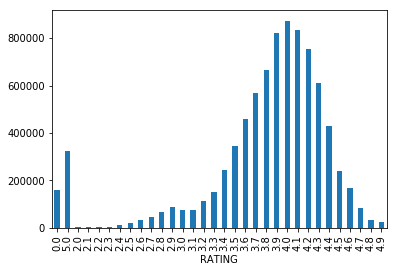

In [12]:
train_df.groupby(['RATING'])['COST'].sum().plot(kind='bar')

In [13]:
# CHANGING THE OBJECT TYPE 'RATING' FEATURE INTO FLOAT
train_df['RATING'] = train_df['RATING'].astype(float) # replace the rating
# for test set
test_df['RATING'] = test_df['RATING'].astype(float) # replace the rating

In [14]:
# CHECKING THE UNIQUE VALUES IN THE FEATURE 'CITY'
train_df['CITY'].nunique()

359

In [15]:
# Values in the City feature
train_df['CITY'].value_counts()

Chennai                      2174
Bangalore                    2149
Hyderabad                    1819
Mumbai                       1722
New Delhi                    1321
Kochi                        1279
Gurgaon                       379
Secunderabad                  310
Noida                         211
Navi Mumbai                   165
Ghaziabad                     102
Thane                          97
Faridabad                      79
Bandra West                    69
Thane West                     52
Andheri West                   48
Bengaluru                      42
Greater Noida                  31
India                          23
Kakkanad                       15
Ernakulam                      14
Dwarka                         10
Kerala                         10
Delhi NCR                       9
Delhi                           8
Hyderabad.                      7
Telangana                       7
Edappally                       7
Gurugram                        7
Bengalore     

In [16]:
# Checking the Mean of the cost of the fooda at different cities
print("Mean of cost at Mumabi",train_df[train_df['CITY'] == 'Mumbai']['COST'].mean())
print("Mean of cost at Chennai",train_df[train_df['CITY'] == 'Chennai']['COST'].mean())
print("Mean of cost at Banglore",train_df[train_df['CITY'] == 'Bangalore']['COST'].mean())

Mean of cost at Mumabi 865.2729384436701
Mean of cost at Chennai 588.5878564857405
Mean of cost at Banglore 668.733829688227


In [17]:
# JOINING THE TRAINING AND TESTING DATASET
train_df['source']= 'train'
test_df['source'] = 'test'

In [18]:
full_df=pd.concat([train_df, test_df],ignore_index=True)

In [19]:
train_df.shape,test_df.shape,full_df.shape

((12690, 10), (4231, 9), (16921, 10))

In [20]:
full_df.isnull().sum()

CITY              147
COST             4231
CUISINES            0
LOCALITY          128
RATING              0
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
source              0
dtype: int64

In [21]:
full_df['LOCALITY'].value_counts()

Gachibowli                               216
Indiranagar                              187
Kakkanad                                 175
Kukatpally                               171
Madhapur                                 169
Whitefield                               164
Banjara Hills                            157
Edappally                                154
HSR                                      149
Marathahalli                             148
Jubilee Hills                            144
Fort Kochi                               138
BTM                                      131
Nungambakkam                             131
MG Road                                  127
Kaloor                                   123
Jayanagar                                121
T. Nagar                                 116
Andheri West                             116
Kondapur                                 113
JP Nagar                                 106
Borivali West                            105
Velachery 

In [22]:
# Filling the missing value with the mode
full_df['LOCALITY'].fillna(full_df['LOCALITY'].mode()[0],inplace=True)

In [23]:
new1_test = full_df["VOTES"].str.split(" ", n = 1, expand =True)

In [24]:
full_df['votes_no'] = new1_test[0]
full_df['votes'] = new1_test[1]

In [25]:
full_df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,source,votes_no,votes
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,train,49,votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,train,30,votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,train,221,votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,train,24,votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,train,165,votes


In [26]:
# Converting the votes_no into float
full_df['votes_no'] = full_df['votes_no'].astype(float)

In [27]:
# Filling the Missing value of feature 'City' by it's mode
full_df['CITY'] = full_df['CITY'].fillna('Chennai')

In [28]:
# Filling the Missing value of feature 'LOCALITY' by it's mode
full_df['LOCALITY'] = full_df['LOCALITY'].fillna('Gachibowli')

In [29]:
# Again checking for any missing values
full_df.isnull().sum()

CITY                0
COST             4231
CUISINES            0
LOCALITY            0
RATING              0
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
source              0
votes_no         1606
votes            1606
dtype: int64

In [30]:
full_df['votes_no'] = full_df['votes_no'].fillna(44.0) # filling with mode

In [31]:
# Dropping the votes features
full_df = full_df.drop(['VOTES', 'votes'], axis=1)

In [32]:
# FEATURE ENGINEERING
# CONVERTING THE TEXT DATA INTO BINARY FORM 
# EXTRACTING THE DATA
full_df['title_rat'] = full_df['TITLE'].map(full_df.groupby('TITLE')['RATING'].mean())
full_df['title_rat_C'] = full_df['TITLE'].map(full_df.groupby('TITLE')['RATING'].count())
full_df['city_rat'] = full_df['CITY'].map(full_df.groupby('CITY')['RATING'].mean())
full_df['city_rat_C'] = full_df['CITY'].map(full_df.groupby('CITY')['RATING'].count())
full_df['cuisine_rat'] = full_df['CUISINES'].map(full_df.groupby('CUISINES')['RATING'].mean())
full_df['cuisine_rat_C'] = full_df['CUISINES'].map(full_df.groupby('CUISINES')['RATING'].count())
full_df['rest_id'] = full_df['RESTAURANT_ID'].map(full_df.groupby('RESTAURANT_ID')['RATING'].count())
full_df['rest_id_votes'] = full_df['RESTAURANT_ID'].map(full_df.groupby('RESTAURANT_ID')['votes_no'].count())
full_df['title_rat_sum'] = full_df['TITLE'].map(full_df.groupby('TITLE')['RATING'].sum())
full_df['title_rat_C_sum'] = full_df['TITLE'].map(full_df.groupby('TITLE')['RATING'].sum())
full_df['city_rat_sum'] = full_df['CITY'].map(full_df.groupby('CITY')['RATING'].sum())
full_df['city_rat_C_sum'] = full_df['CITY'].map(full_df.groupby('CITY')['RATING'].sum())
full_df['cuisine_rat_sum'] = full_df['CUISINES'].map(full_df.groupby('CUISINES')['RATING'].sum())
full_df['cuisine_rat_C_sum'] = full_df['CUISINES'].map(full_df.groupby('CUISINES')['RATING'].sum())
full_df['rat_vote'] = full_df['RATING'] * full_df['votes_no']

In [33]:
# Converting the extracted data into binary  form 
# Importing the label Encoder
from sklearn.preprocessing import LabelEncoder
cols = ('CUISINES', 'TIME', 'LOCALITY', 'TITLE', 'CITY')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(full_df[c].values)) 
    full_df[c] = lbl.transform(list(full_df[c].values))

# shape        
print('Shape all_data: {}'.format(full_df.shape))

Shape all_data: (16921, 25)


In [34]:
full_df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,source,votes_no,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
0,400,1200.0,3294,328,3.6,9438,898,34,train,49.0,...,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6,176.4
1,75,1500.0,364,1214,4.2,13198,2301,36,train,30.0,...,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2,126.0
2,75,800.0,3729,1272,3.8,10915,806,34,train,221.0,...,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6,839.8
3,277,800.0,5156,161,4.1,6346,340,104,train,24.0,...,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2,98.4
4,277,300.0,2218,709,3.8,15387,750,55,train,165.0,...,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1,627.0


In [35]:
Train = full_df.loc[full_df['source']=='train']
Test = full_df.loc[full_df['source']=='test']

In [36]:
# Dividing the independent and dependent variables
X = Train.drop(['COST','source'], axis=1)
y = tst

In [37]:
X.dtypes

CITY                   int64
CUISINES               int64
LOCALITY               int64
RATING               float64
RESTAURANT_ID          int64
TIME                   int64
TITLE                  int64
votes_no             float64
title_rat            float64
title_rat_C            int64
city_rat             float64
city_rat_C             int64
cuisine_rat          float64
cuisine_rat_C          int64
rest_id                int64
rest_id_votes          int64
title_rat_sum        float64
title_rat_C_sum      float64
city_rat_sum         float64
city_rat_C_sum       float64
cuisine_rat_sum      float64
cuisine_rat_C_sum    float64
rat_vote             float64
dtype: object

In [38]:
# MODELS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
# Function for the estimation of the score
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [41]:
dtc = DecisionTreeRegressor(max_depth=5)

In [42]:
dtc.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [43]:
# Prediction
y_pred = dtc.predict(X_test)
score(y_pred,y_test)*100

99.76564009117482

In [44]:
# OUR MODEL HAS PREDICTED 99.75 % WHICH IS 100 % accuracy and it's perfect .

In [45]:
# Linear regression
lg = LinearRegression()
lg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
# Prediction
y_pred = lg.predict(X_test)
score(y_pred,y_test)*100

99.64042828852956

In [47]:
# Regression model has also predicted 100 % accuracy which is perfect
# analysis through Bagging model
rf = RandomForestRegressor(n_estimators=30, max_depth=5)

In [48]:
rf.fit(X_train,y_train)
# Prediction
y_pred = rf.predict(X_test)
score(y_pred,y_test)*100

99.77059630943157

 ENSEMBLE model has also predicted model with 100% accuracy which is perfect
 Hyperparameter tuning is not required in these models as model already had predicted with 100% accuracy

In [49]:
# Saving the Random Forest Model as it has predicted the best 
# Importing Pickle
import pickle
filehandler = open("Project_34.obj","wb")
# saving the model in pickel string
saved_rf_model = pickle.dump(rf,filehandler)
filehandler.close()